In [44]:
import nltk
#nltk.download('inaugural')
from nltk.corpus import inaugural

In [45]:
inaugural.raw('1941-Roosevelt.txt')

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [46]:

inaugural.raw('1961-Kennedy.txt')

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [47]:
inaugural.raw('1973-Nixon.txt')

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

## 2.1) Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts)

In [48]:
#number of characters.
print('The number of characters in Roosevelts speech -',len(inaugural.raw('1941-Roosevelt.txt')))
print('The number of characters in Kennedys speech -',len(inaugural.raw('1961-Kennedy.txt')))
print('The number of characters in Nixons speech -',len(inaugural.raw('1973-Nixon.txt')))

The number of characters in Roosevelts speech - 7571
The number of characters in Kennedys speech - 7618
The number of characters in Nixons speech - 9991


In [49]:
# number of words
print('The number of words in Roosevelts speech -',len(inaugural.words('1941-Roosevelt.txt')))
print('The number of words in Kennedys speech -',len(inaugural.words('1961-Kennedy.txt')))
print('The number of words in Nixons speech -',len(inaugural.words('1973-Nixon.txt')))

The number of words in Roosevelts speech - 1536
The number of words in Kennedys speech - 1546
The number of words in Nixons speech - 2028


In [50]:
# number of sentences
print('The number of sentences in Roosevelts speech -',len(inaugural.sents('1941-Roosevelt.txt')))
print('The number of sentences in Kennedys speech -',len(inaugural.sents('1961-Kennedy.txt')))
print('The number of sentences in Nixons speech -',len(inaugural.sents('1973-Nixon.txt')))

The number of sentences in Roosevelts speech - 68
The number of sentences in Kennedys speech - 52
The number of sentences in Nixons speech - 69


## 2.2) Remove all the stopwords from the three speeches. Show the word count before and after the removal of stopwords. Show a sample sentence after the removal of stopwords.

In [51]:
import string
import pandas as pd

In [52]:
text_df=pd.read_excel('Project_Speech.xlsx')

In [53]:
#Removing lower case
text_df['Speech'] = text_df['Speech'].apply(lambda x: " ".join(x.lower() for x in x.split()))
text_df['Speech'].head()

0    on each national day of inauguration since 178...
1    vice president johnson, mr. speaker, mr. chief...
2    mr. vice president, mr. speaker, mr. chief jus...
Name: Speech, dtype: object

In [54]:
text_df['Speech'] = text_df['Speech'].str.replace('[^a-z\s]','')
#\s: Returns a match where the string contains a white space character.
#[^]: Returns a match for any character EXCEPT what is written after it.
text_df.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_5736\3910179630.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  text_df['Speech'] = text_df['Speech'].str.replace('[^a-z\s]','')


,Name,Speech
0,Roosevelt,on each national day of inauguration since th...
1,Kennedy,vice president johnson mr speaker mr chief jus...
2,Nixon,mr vice president mr speaker mr chief justice ...


In [55]:
#Removing stopwords
from nltk.corpus import stopwords
import string
stop = stopwords.words('english')+list(string.punctuation)+['--','mr']
text_df['Speech'] = text_df['Speech'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
text_df.head()

,Name,Speech
0,Roosevelt,national day inauguration since people renewed...
1,Kennedy,vice president johnson speaker chief justice p...
2,Nixon,vice president speaker chief justice senator c...


In [56]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
text_df['Speech']=text_df['Speech'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [57]:
a=len(text_df['Speech'].iloc[0].split())
b=len(text_df['Speech'].iloc[1].split())
c=len(text_df['Speech'].iloc[2].split())
text_df['wordcount_after_stopremoval']=[a,b,c]


In [58]:
text_df

,Name,Speech,wordcount_after_stopremoval
0,Roosevelt,nation day inaugur sinc peopl renew sens dedic...,620
1,Kennedy,vice presid johnson speaker chief justic presi...,685
2,Nixon,vice presid speaker chief justic senat cook mr...,815


## Sample Sentences

In [59]:
#roosevelt
text_df['Speech'].iloc[0]

'nation day inaugur sinc peopl renew sens dedic unit statesnnin washington day task peopl creat weld togeth nationnnin lincoln day task peopl preserv nation disrupt withinnnin day task peopl save nation institut disrupt withoutnnto us come time midst swift happen paus moment take stock recal place histori rediscov may risk real peril inactionnnl nation determin count year lifetim human spirit life man threescor year ten littl littl less life nation full measur livennther men doubt men believ democraci form govern frame life limit measur kind mystic artifici fate unexplain reason tyranni slaveri becom surg wave futur freedom eb tidennbut american know truenneight year ago life republ seem frozen fatalist terror prove true midst shock act act quickli boldli decisivelynnthes later year live year fruit year peopl democraci brought us greater secur hope better understand life ideal measur materi thingsnnmost vital present futur experi democraci success surviv crisi home put away mani evil t

In [60]:
#Kennedy
text_df['Speech'].iloc[1]

'vice presid johnson speaker chief justic presid eisenhow vice presid nixon presid truman reverend clergi fellow citizen observ today victori parti celebr freedom symbol end well begin signifi renew well chang sworn almighti god solemn oath forebear l prescrib nearli centuri three quarter agonnth world differ man hold mortal hand power abolish form human poverti form human life yet revolutionari belief forebear fought still issu around globe belief right man come generos state hand godnnw dare forget today heir first revolut let word go forth time place friend foe alik torch pass new gener american born centuri temper war disciplin hard bitter peac proud ancient heritag unwil wit permit slow undo human right nation alway commit commit today home around worldnnlet everi nation know whether wish us well ill shall pay price bear burden meet hardship support friend oppos foe order assur surviv success libertynnthi much pledg morennto old alli whose cultur spiritu origin share pledg loyalti

In [61]:
#Nixon
text_df['Speech'].iloc[2]

'vice presid speaker chief justic senat cook mr eisenhow fellow citizen great good countri share togethernnwhen met four year ago america bleak spirit depress prospect seemingli endless war abroad destruct conflict homenna meet today stand threshold new era peac worldnnth central question us shall use peac let us resolv era enter postwar period often time retreat isol lead stagnat home invit new danger abroadnnlet us resolv becom time great respons greatli born renew spirit promis america enter third centuri nationnnthi past year saw farreach result new polici peac continu revit tradit friendship mission peke moscow abl establish base new durabl pattern relationship among nation world america bold initi long rememb year greatest progress sinc end world war ii toward last peac worldnnth peac seek world flimsi peac mere interlud war peac endur gener comennit import understand necess limit america role maintain peacennunless america work preserv peac peacennunless america work preserv fre

## 2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [62]:
#Roosevelt 
all_words0=text_df['Speech'].iloc[0].split()
words=pd.DataFrame(data=all_words0, columns=['words'])
words.value_counts().head(3)

words 
nation    16
know      10
life       8
dtype: int64

In [63]:
#Kennedy
all_words1=text_df['Speech'].iloc[1].split()
words=pd.DataFrame(data=all_words1, columns=['words'])
words.value_counts().head(3)

words
us       11
let      11
power     9
dtype: int64

In [64]:
#Nixon
all_words2=text_df['Speech'].iloc[2].split()
words=pd.DataFrame(data=all_words2, columns=['words'])
words.value_counts().head(3)

words  
us         26
america    19
respons    16
dtype: int64

## Wordcloud

In [65]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


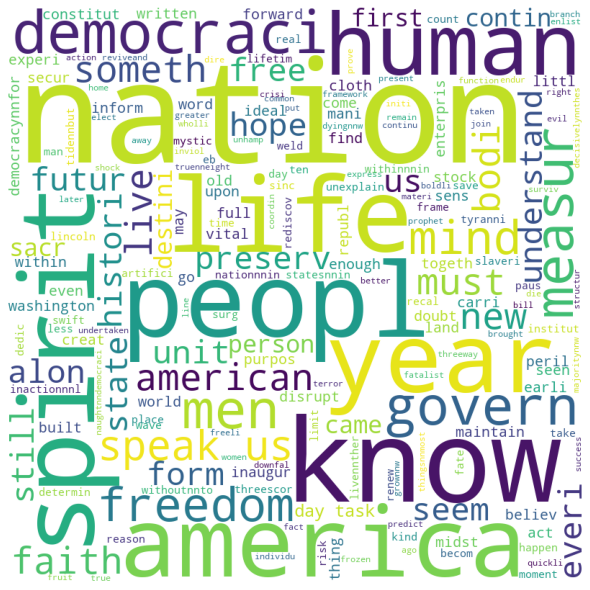

In [66]:
#Roosevelt
wc_a=str(text_df['Speech'].iloc[0])
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(wc_a)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

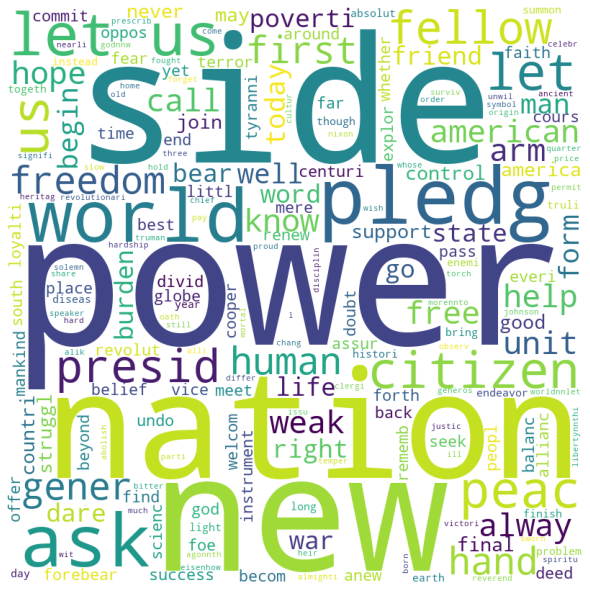

In [67]:
#Kennedy
wc_a=str(text_df['Speech'].iloc[1])
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(wc_a)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

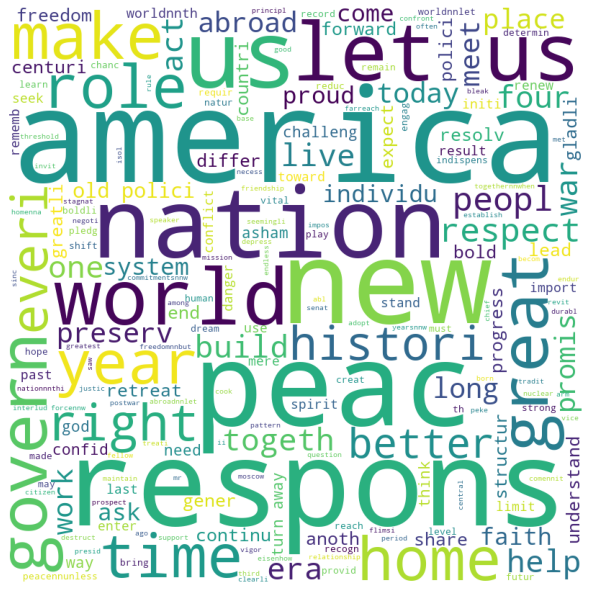

In [68]:
#Nixon
wc_a=str(text_df['Speech'].iloc[2])
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(wc_a)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()